# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Sesion 2, Actividad I
**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>



<hr>


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


## 3. Optimizacion del grado del polinomio. 

### 3.1 Leer el dataset

In [2]:
# Leer el archivo "dataset1.csv" como  Pandas dataframe
df = pd.read_csv('dataset1.csv')

# Eche un vistazo rápido al conjunto de datos
df.head()



,x1,y1
0,0.265960,1.624972
1,0.516805,2.734012
2,0.658542,4.628908
3,1.678052,5.186455
4,2.112463,8.395088


Text(0.5, 1.0, 'y1 vs x1')

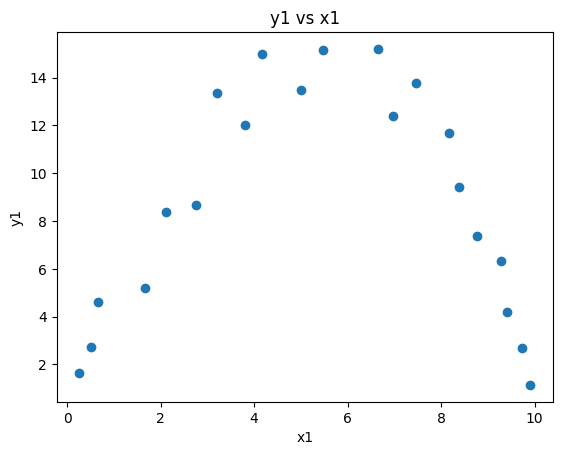

In [3]:
## Graficar los datos
plt.plot(df['x1'], df['y1'], 'o')
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('y1 vs x1')

### ⏸ Según el gráfico anterior, ¿podria indicar el grado optimo del polinomio para una regresion lineal polinomial?

Respuesta: `grado 2`

### 3.2 Obtener las variables de entrada y salida

In [4]:
# Asigne los valores de las columnas x e y a la
# variables predictoras y de respuesta
# Variable predictora
x = df[["x1"]].values
# Variable de respuesta
y = df["y1"].values




### 3.3 Train-validation split

Dividir los datos de entrada en `Train/Validation` sets

In [13]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y validación con un conjunto de entrenamiento del 75 %
# Establecer estado_aleatorio=1
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=0.2)
# random_state=1 para reproducibilidad

InvalidParameterError: The 'random_state' parameter of train_test_split must be an int in the range [0, 4294967295], an instance of 'numpy.random.mtrand.RandomState' or None. Got 0.2 instead.

Text(0.5, 1.0, 'y1 vs x1')

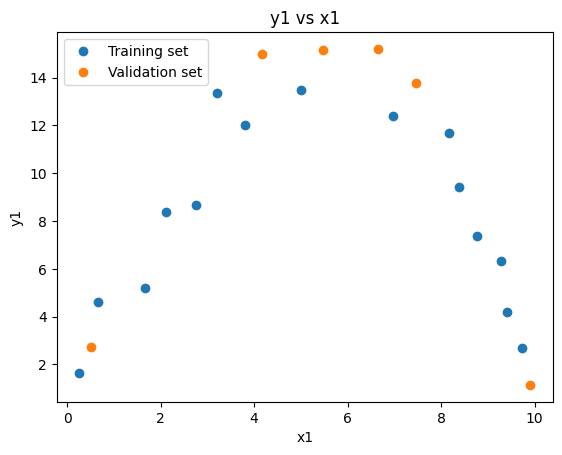

In [ ]:
# graficar los sets de train y validacion
plt.plot(x_train, y_train, 'o', label='Training set')
plt.plot(x_val, y_val, 'o', label='Validation set')     
plt.xlabel('x1')
plt.ylabel('y1')
plt.legend(loc="best")
plt.title('y1 vs x1')



Cambiar el estado aleatorio y anotar sus observaciones respecto a la eleccion de los  datos en cada set.

### 3.4 Cálculo del train & validation error en términos de MSE

In [ ]:
# Completar el siguiente codigo

# Seleccionar el grado maximo a iterar
maxdeg = 15
training_error = []
validation_error = []

for d in range(maxdeg):
    # calculo de los polynomial features
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_val   = PolynomialFeatures(degree=d).fit_transform(x_val)
    # Inicializar el modelo de regresion sin utilizar el intercept
    lreg = LinearRegression(fit_intercept=False)

    # Ajustar el modelo en los datos de entrenamiento
    lreg.fit(x_poly_train, y_train)
    # Utilizar el modelo entrenado para predecir en los datos transformados del train set
    y_train_pred = lreg.predict(x_poly_train)
    
    # Utilizar el modelo entrenado para predecir en los datos transformados del validation set
    y_val_pred   = lreg.predict(x_poly_val)

    # Calcular el error en base a los datos en y_train_pred y y_val_pred
    error_train = mean_squared_error(y_train,y_train_pred) # y_train = 1.2 , y_pred = 1.3  => (-0.1)^2
    error_val   = mean_squared_error(y_val_pred, y_val)
    # adicionar los errores calculados a la lista de training_error y validation_error
    training_error.append(error_train)
    validation_error.append(error_val)



    

### 3.5 Encontrar el modelo optimo

In [ ]:
###
print(training_error)


[14.403954723788706, 14.36184535993026, 1.4565803641487578, 1.0701271643695345, 1.0698608304657564, 1.0096837157077825, 1.0083713833243082, 0.8074400428290703, 0.7269804028304238, 0.7235489866195292, 0.6468984340825649, 0.6467249457807457, 0.6417138270314108, 0.5809075354096981, 0.8017709028496256]


In [ ]:
validation_error

[42.85648001438554,
 42.72231704723106,
 3.6696196613016077,
 1.736382176936767,
 1.7590651265194257,
 2.1895640955413156,
 2.1962657499572513,
 3.4571586678299737,
 2.9415994163262034,
 2.953752206274275,
 4.547240132535112,
 4.5774533014863446,
 4.268856329247629,
 28.459122301940752,
 33.10915521203422]

In [ ]:
error_min_val = min(validation_error)
print("El error min de validacion:", error_min_val)
# El indice del error minimo de validacion
grado_optimo = validation_error.index(error_min_val)
print("El grado optimo es:", grado_optimo)

El error min de validacion: 1.736382176936767
El grado optimo es: 3


### 3.6 Graficar el error vs grado del polinomio

Text(0.5, 1.0, 'Curva de MSE de validacion y entrenamiento')

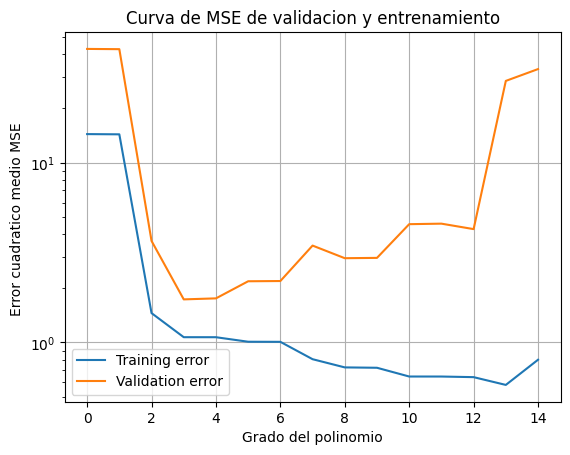

In [ ]:
grado_polin = list(range(maxdeg))
plt.semilogy(grado_polin, training_error, label='Training error')
plt.semilogy(grado_polin, validation_error, label='Validation error')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadratico medio MSE ' )
plt.legend(loc="best")
plt.grid()
plt.title('Curva de MSE de validacion y entrenamiento')

⏸  Si ejecutas el ejercicio con un estado aleatorio de 0, ¿notas algún cambio? ¿A qué atribuirías este cambio?"""

In [14]:

# Submit an answer choice as a string below 
answer1 = 'Cambian los valores, entiendo que es por la variacion en la particion de los datos con los que se entrenan y validan los modelos'
